(sec-cxgate)=
# CX gate

CX (Controlled-X), known also as `CNOT`, is one of the most essential gates for quantum computation.  

## Definition

**Operational Definition**

When gate CX$_{q_0}^{q_1}$ acts on $|q_1\, q_0\rangle$, X is applied to $q_1$ if $q_0=1$ and nothing is done otherwise.[^symb-cx] Qubit $q_0$ serves as source and $q_1$ as target. Mathematically, it is expressed as

$$
\text{CX}_{q_0}^{q_1} = \text{I} \otimes |0\rangle\langle 0| + \text{X} \otimes |1\rangle\langle 1|
$$

Switching source and target qubits, 

CX$_{q_1}^{q_0}|q_1\, q_0\rangle$ means "Apply X to $q_0$ if $q_1=1$ and do nothing otherwise."  Mathematically, it is expressed as

$$
\text{CX}_{q_1}^{q_0} = |0\rangle\langle 0| \otimes \text{I}   +   |1\rangle\langle 1| \otimes \text{X}
$$

**Transformation**

CX transforms computational basis as follows:

$$
\begin{align}
\text{CX}_{q_0}^{q_1} \lvert 00\rangle &= \lvert 00\rangle \\
\text{CX}_{q_0}^{q_1} \lvert 01\rangle &= \lvert 11\rangle \\
\text{CX}_{q_0}^{q_1} \lvert 10\rangle &= \lvert 10\rangle \\
\text{CX}_{q_0}^{q_1} \lvert 11\rangle &= \lvert 01\rangle 
\end{align}
$$

$$
\begin{align}
\text{CX}_{q_0}^{q_1} \lvert 00\rangle &= \lvert 00\rangle \\
\text{CX}_{q_1}^{q_0} \lvert 01\rangle &= \lvert 01\rangle \\
\text{CX}_{q_1}^{q_0} \lvert 10\rangle &= \lvert 11\rangle \\
\text{CX}_{q_1}^{q_0} \lvert 11\rangle &= \lvert 10\rangle 
\end{align}
$$

**Matrix representation**

$$
\text{CX}_{q_0}^{q_1} = \begin{bmatrix} 1&0&0&0\\0&0&0&1\\0&0&1&0\\0&1&0&0\end{bmatrix}
$$

which is default CX in Qiskit.  In many literature, `CX` corresponds to:

$$
\text{CX}_{q_1}^{q_0} = \begin{bmatrix} 1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{bmatrix}
$$

Don't get confused. Our notation avoids the confusion.  

The Qiskit circuit symbol is `cx` and it appears in circuit as:

In [1]:
from qiskit import QuantumCircuit
qc=QuantumCircuit(2)

# CX_{q0,q1}
qc.cx(0,1)
# CX_{q1,q0}
qc.cx(1,0)

print(qc)

          ┌───┐
q_0: ──■──┤ X ├
     ┌─┴─┐└─┬─┘
q_1: ┤ X ├──■──
     └───┘     


## Acting on superposition state


CX$_{q_0}^{q_1}$ swaps the coefficients of $|01\rangle$ and $|11\rangle$.

$$
\text{CX}_{q_0}^{q_1} \left (c_{00} |00\rangle + c_{01} |01\rangle + c_{10} |10\rangle + c_{11} |11\rangle \right ) =
c_{00} |00\rangle + c_{11} |01\rangle + c_{10} |10\rangle + c_{01} |11\rangle
$$

Similarly, CX$_{q_1}^{q_0}$ swaps the coefficients of $|10\rangle$ and $|11\rangle$.

$$
\text{CX}_{q_1}^{q_0} \left (c_{00} |00\rangle + c_{01} |01\rangle + c_{10} |10\rangle + c_{11} |11\rangle \right ) =
c_{00} |00\rangle + c_{01} |01\rangle + c_{11} |10\rangle + c_{10} |11\rangle
$$

The following Qiskit example demonstrates it.

In [2]:
from qiskit import *

qr=QuantumRegister(2,'q')
qc=QuantumCircuit(qr)

qc.x([0,1])
qc.h([0,1])

qc.draw()

┌───┐┌───┐
q_0: ┤ X ├┤ H ├
     ├───┤├───┤
q_1: ┤ X ├┤ H ├
     └───┘└───┘

In [3]:
from qiskit.quantum_info import Statevector
# state before applying CX
print("State before applying CX.")
Statevector(qc).draw('latex')

State before applying CX.


<IPython.core.display.Latex object>

In [4]:
qc.cx(0,1)
qc.draw()

┌───┐┌───┐     
q_0: ┤ X ├┤ H ├──■──
     ├───┤├───┤┌─┴─┐
q_1: ┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘

In [5]:
# state after applyiong CX
print("State after applying CX.")
Statevector(qc).draw('latex')

State after applying CX.


<IPython.core.display.Latex object>

Compare the states before and after applying `CX` and find how the coefficients changed.

:::{admonition} Source qubit not necessarily preserved by control gates
:class: warning

The definition of CX seems indicating that only the state of the target qubit is modified and the state of the source qubit remains the same.  Surprisingly, that is not true.  In some cases, the state of the source qubit also changes.

Let us look at the above example more carefully.  The state before applying CX$_{q_0}^{q_1}$ is

$$
\frac{1}{2}\left(|00\rangle - |01\rangle - |10\rangle + |11\rangle\right) = 
\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right) \otimes \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right) = |-\rangle\otimes |-\rangle
$$

and after applying `CX`$_{q_0}^{q_1}$ ,

$$
\frac{1}{2}\left(|00\rangle + |01\rangle - |10\rangle - |11\rangle\right) = 
\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right) \otimes \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right) = |-\rangle\otimes |+\rangle
$$

Notice that the source qubit is transformed from $|-\rangle$ to $|+\rangle$.  This kind of transformation is called *phase kickback* since the phase of the source qubit changed.  The phase kickback is a ubiquitous strategy in quantum algorithms.  See the next subsection.

:::

(ssec-cx-kickback)=
## Phase kickback

Let us look at the action of CX on z-basis $|\pm\pm\rangle$.  We assume that $q_0$ is the control qubit and $q_1$ is the target. 

$$
\begin{align}
\text{CX}_{q_0}^{q_1} |++\rangle &= \frac{1}{2} \text{CX}_{q_0}^{q_1} \left(|00\rangle + |01\rangle  + |10\rangle + |11\rangle \right)
&&=  \frac{1}{2} \left(|00\rangle + |11\rangle  + |10\rangle + |01\rangle \right) &= |++\rangle \\
\text{CX}_{q_0}^{q_1} |+-\rangle &= \frac{1}{2} \text{CX}_{q_0}^{q_1} \left(|00\rangle - |01\rangle  + |10\rangle - |11\rangle \right)
&&=  \frac{1}{2} \left(|00\rangle - |11\rangle  + |10\rangle - |11\rangle \right) &= |+-\rangle \\
\text{CX}_{q_0}^{q_1} |-+\rangle &= \frac{1}{2} \text{CX}_{q_0}^{q_1} \left(|00\rangle + |01\rangle  - |10\rangle - |11\rangle \right)
&&=  \frac{1}{2} \left(|00\rangle + |11\rangle  - |10\rangle - |01\rangle \right) &= |--\rangle \\
\text{CX}_{q_0}^{q_1} |--\rangle &= \frac{1}{2} \text{CX}_{q_0}^{q_1} \left(|00\rangle - |01\rangle  - |10\rangle + |11\rangle \right)
&&=  \frac{1}{2} \left(|00\rangle - |11\rangle  - |10\rangle + |01\rangle \right) &= |-+\rangle
\end{align}
$$

This transformation can be described as "Apply Z to $q_0$ if $q_1=-$ and do nothing otherwise." Interestingly, now $q_1$ is the control qubit and $q_0$ is the target.  The gate has not change and  this operation is still "Apply X to $q_1$ if $q_0=1$ and do nothing otherwise."  The two operations are equivalent. The reversal of control-target relation is known as signature of *phase kickback*.  Other controlled gates also show phase kickback.

Remembering that the Hadamard gate changes basis set from z-basis to x-basis and vice versa. Applying H gate before CX we can realize the phase kickback shown above. After the kickback, we can go back to z-basis by another H gate. Then, we have reversed CX.

In the following example, we start with an initial state $|10\rangle$. In the first example, the basis is switched to x-basis by H gate and apply CX$_{q_0}^{q_1}$. In the second computation, CX$_{q_1}^{q_0}$ is directly applied. Both get the same result. Try other initial conditions and confirm that the two circuits do the same transformation.

In [6]:
from qiskit import *

qr = QuantumRegister(2,'q')
qc = QuantumCircuit(qr)

qc.x(1)
qc.barrier()
qc.h([0,1])
qc.cx(0,1)
qc.h([0,1])
qc.draw()

░ ┌───┐     ┌───┐
q_0: ──────░─┤ H ├──■──┤ H ├
     ┌───┐ ░ ├───┤┌─┴─┐├───┤
q_1: ┤ X ├─░─┤ H ├┤ X ├┤ H ├
     └───┘ ░ └───┘└───┘└───┘

In [7]:
from qiskit.quantum_info import Statevector
Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

However, this must be equivalent to 

In [8]:
qc = QuantumCircuit(qr)
qc.x(1)
qc.barrier()
qc.cx(1,0)   
qc.draw()        

░ ┌───┐
q_0: ──────░─┤ X ├
     ┌───┐ ░ └─┬─┘
q_1: ┤ X ├─░───■──
     └───┘ ░

In [9]:
Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

## Change of basis

Suppose that we want to flip $q_1$  if $q_0$ is $|-\rangle$ and do nothing otherwise.  We change the basis of $q_0$ using H gate, apply CX$_{q_0}^{q_1}$, and apply H again to $q_0$.  Note that the third step bring $q_0$ back to the original state.  We can generate superposition of Bell states using the circuit.

$$
\begin{align}
\text{H}_{q_0} \cdot \text{CX}_{q_0}^{q_1} \cdot \text{H}_{q_0} |00\rangle &= \frac{1}{2}\left(|00\rangle + |01\rangle + |10\rangle - |11\rangle \right) = \frac{1}{\sqrt{2}} \left( \Phi^{-} + \Psi^{+} \right) \\
\text{H}_{q_0} \cdot \text{CX}_{q_0}^{q_1} \cdot \text{H}_{q_0} |01\rangle &= \frac{1}{2}\left(|00\rangle - |01\rangle + |10\rangle + |11\rangle \right) = \frac{1}{\sqrt{2}} \left( \Phi^{+} - \Psi^{-} \right) \\
\text{H}_{q_0} \cdot \text{CX}_{q_0}^{q_1} \cdot \text{H}_{q_0} |10\rangle &= \frac{1}{2}\left(|00\rangle + |01\rangle - |10\rangle + |11\rangle \right) = \frac{1}{\sqrt{2}} \left( \Phi^{+} + \Psi^{-} \right) \\
\text{H}_{q_0} \cdot \text{CX}_{q_0}^{q_1} \cdot \text{H}_{q_0} |11\rangle &= \frac{1}{2}\left(-|00\rangle + |01\rangle + |10\rangle + |11\rangle \right) = \frac{1}{\sqrt{2}} \left( -\Phi^{-} + \Psi^{+} \right)
\end{align}
$$

If we want to flip the target qubit also in x-basis, H gate is applied on $q_1$ before and after CX. as well.  However, this circuit is identical to just a single CX since it does the same transformation simply in a different basis. 


The following example generates $\frac{1}{\sqrt{2}} \left( \Phi^{-} + \Psi^{+} \right)$.

In [10]:
from qiskit import *

qr=QuantumRegister(2,'q')
qc=QuantumCircuit(qr)

qc.h(0)
qc.cx(0,1)
qc.h(0)

qc.draw()

┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ H ├
     └───┘┌─┴─┐└───┘
q_1: ─────┤ X ├─────
          └───┘

In [11]:
from qiskit.quantum_info import Statevector

Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

## Simple applications

As the above example shows, CX gate is used to create Bell states.  In {numref}`chap-algorithms`, many quantum strategies that use CX extensively will be discussed.  Here are a few small applications.

### Generating Bell states
The 
No one-qubit gate can generate an entangled state.  The CX gate is commonly used to generate entangled states from product states.  As discussed in {numref}`sec-2qubits`, Bell states play important roles in quantum computation. We can generate all Bell states by by applying CX_{q_0}^{q_1} \cdot H_{q_0}$ to the computational basis vectors.

$$
\begin{align}
CX_{q_0}^{q_1} \cdot H_{q_0} |00\rangle &= |\Phi^{+}\rangle \\
CX_{q_0}^{q_1} \cdot H_{q_0} |01\rangle &= |\Phi^{-}\rangle \\
CX_{q_0}^{q_1} \cdot H_{q_0} |10\rangle &= |\Psi^{+}\rangle \\
CX_{q_0}^{q_1} \cdot H_{q_0} |11\rangle &= -|\Psi^{-}\rangle
\end{align}
$$(cbase-Bell)

The last one has unwanted phase "-".  We can get rid of it by applying Z on both qubits.  In the following Qiskit code, we generate the singlet state $|\Psi^{-}$.

**Exercise**  {numref}`%s <sec-cxgate>`.1  Generate $|\Psi^{\pm}\rangle$ and visualize the results using Qiskit. (HINT: You can flip one of qubits by X gate.

In [12]:
from qiskit import *
from qiskit.quantum_info import Statevector

qr=QuantumRegister(2,'q')
qc=QuantumCircuit(qr)

# generate |11>
qc.x([0,1])

# apply CX*H
qc.h(0)
qc.cx(0,1)

# adjust phase
qc.z([0,1])

psi=Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

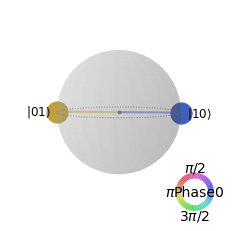

In [13]:
from qiskit.visualization import plot_state_qsphere
# it's an entangled state.  Use qsphere.
plot_state_qsphere(psi,figsize=(4,4))

**Exercise**  {numref}`%s <sec-cpgate>`.1  Generate $|\Phi^{\pm}\rangle$ and visualize the results using Qiskit.

(ssec-bell-measurement)=
### Bell state measurement

We can expand any two qubit states in the Bell basis as

$$
|\psi\rangle = c_{\Phi^+} |\Phi^{+}\rangle + c_{\Phi^-} |\Phi^{-}\rangle + c_{\Psi^+} |\Psi^{+}\rangle + c_{\Psi^-} |\Phi^{-}\rangle .
$$(bell-expansion)

Now, we want find the probabilities to find the Bell states. The process is called *Bell measurement*.  After the measurement, the state collapses to a Bell state depending on the outcome of the measurement.  The Bell measurement is commonly used in quantum information processes, such as [*quantum teleportation*](https://en.wikipedia.org/wiki/Quantum_teleportation).  However, the Bell measurement is not trivial.  Any local measurement fails and thus the standard measurement based on the computational basis does not help.

In the example above, we transformed the computational basis vectors to the Bell states using CX$_{q_0}^{q_1} \cdot$ H$_{q_0}$.  By inverting the transformation, we can convert the Bell states to the computational basis.  That is applying H$_{q_0} \cdot$ CX$_{q_0}^{q_1}$ to the Bell states

$$
\begin{align}
\text{H}_{q_0} \cdot \text{CX}_{q_0}^{q_1} |\Phi^{+}\rangle &= |00\rangle \\
\text{H}_{q_0} \cdot \text{CX}_{q_0}^{q_1} |\Phi^{-}\rangle &= |01\rangle \\
\text{H}_{q_0} \cdot \text{CX}_{q_0}^{q_1} |\Psi^{+}\rangle &= |10\rangle \\
\text{H}_{q_0} \cdot \text{CX}_{q_0}^{q_1} |\Psi^{-}\rangle &= -|11\rangle
\end{align}
$$
Applying $(I \otimes H)\cdot CX$ to the superposition {eq}`bell-expansion`, we obtain 

$$
(I \otimes H)\cdot CX |\psi\rangle = c_{\Phi^+} |00\rangle + c_{\Phi^-} |10\rangle + c_{\Psi^+} |01\rangle - c_{\Psi^-} |11\rangle .
$$(comp-expansion)

The resulting state is a superposition in computational basis but the expansion coefficients are the same as before the transformation.
Now, the standard measurement in the computational basis determine the probabilities of finding the corresponding Bell state.  The actual measurement collapses the state to one of computational basis vectors but the Bell measurement should result in one of the Bell state.
The computational basis vector obtained from the measurement can be transformed back to the corresponding Bell state. 

### Addition modulo 2

We want to compute modulo-2 addition of two bits $x$ and $y$. We write it $x \otimes y$.  Its truth table is

| $x$ | $y$ | $x\oplus y$|
|:---:|:---:| :---------:|
|  0  |  0  |      0     |
|  1  |  0  |      1     |
|  0  |  1  |      1     |
|  1  |  1  |      0     |

In classical computer, XOR gate calculate it. Unlike classical XOR, quantum computation must be reversible.  Thus we need to retain the values of $x$ and $y$. The out needs one qubit.  In total, we need three qubits
$|z\,y\,x\rangle = |z\rangle \otimes |y\rangle \otimes |x\rangle$ where $z$ contains $x \oplus y$ at the end.  We assume that $z=0$ initially.  We want to construct a quantum circuit which transforms $|0\,y,x\rangle$ to $|(x \oplus y)\, y\, x\rangle$.  Writing it explicitly.

$$
\begin{align}
|000\rangle \quad &\Rightarrow \quad |000\rangle \\
|001\rangle \quad &\Rightarrow \quad |101\rangle \\
|010\rangle \quad &\Rightarrow \quad |110\rangle \\
|011\rangle \quad &\Rightarrow \quad |011\rangle
\end{align}
$$

The second transformation can be done by CX$_{q_0}^{q_1}$ and the third transformation can be done by a CX$_{q_1}^{q_2}$. These two gates also works for the first transformation.  However, it does not work for the last transformation.  It takes more than one step.  It would be nice if $z$ is directly correlated to $y$ or $x$. Let us try CX$_{q_0}^{q_1}$.

$$
\begin{align}
\text{CX}_{q_0}^{q_1}|000\rangle = |000\rangle \\
\text{CX}_{q_0}^{q_1}|001\rangle = |011\rangle \\
\text{CX}_{q_0}^{q_1}|010\rangle = |010\rangle \\
\text{CX}_{q_0}^{q_1}|011\rangle = |001\rangle
\end{align}
$$

Now , the output $z$ and $y$ are perfectly correlated.  We can now apply CX$_{q_1}^{q_2}$ to find $z$.

$$
\begin{align}
\text{CX}_{q_1}^{q_2}\text{CX}_{q_0}^{q_1}|000\rangle = \text{CX}_{q_1}^{q_2}|000\rangle = |000\rangle  \\
\text{CX}_{q_1}^{q_2}\text{CX}_{q_0}^{q_1}|001\rangle = \text{CX}_{q_1}^{q_2}|011\rangle = |111\rangle \\
\text{CX}_{q_1}^{q_2}\text{CX}_{q_0}^{q_1}|010\rangle = \text{CX}_{q_1}^{q_2}|010\rangle = |110\rangle \\
\text{CX}_{q_1}^{q_2}\text{CX}_{q_0}^{q_1}|011\rangle = \text{CX}_{q_1}^{q_2}|001\rangle = |001\rangle 
\end{align}
$$

The value of $z$ is correct but $x$ and $y$ are not preserved.  That is not good. Next,we try to recover them by
X$_{q_0}^{q_1}$.

$$
\begin{align}
\text{CX}_{q_0}^{q_1} \text{CX}_{q_1}^{q_2}\text{CX}_{q_0}^{q_1}|000\rangle = \text{CX}_{q_0}^{q_1}|000\rangle = |000\rangle  \\
\text{CX}_{q_0}^{q_1} \text{CX}_{q_1}^{q_2}\text{CX}_{q_0}^{q_1}|001\rangle = \text{CX}_{q_0}^{q_1}|111\rangle = |101\rangle \\
\text{CX}_{q_0}^{q_1} \text{CX}_{q_1}^{q_2}\text{CX}_{q_0}^{q_1}|010\rangle = \text{CX}_{q_0}^{q_1}|110\rangle = |110\rangle \\
\text{CX}_{q_0}^{q_1} \text{CX}_{q_1}^{q_2}\text{CX}_{q_0}^{q_1}|011\rangle = \text{CX}_{q_0}^{q_1}|001\rangle =|011\rangle 
\end{align}
$$

Now we have the desired output.  Three CX gates calculate $x \oplus y$.

In [14]:
from qiskit import *
from qiskit.quantum_info import Statevector
import numpy as np


# loop over all inputs
for x in range(2):
    for y in range(2):

        qr=QuantumRegister(3,'q')
        qc=QuantumCircuit(qr)
 
        # generate input state
        if x==1:
            qc.x(0)     
        if y==1:
            qc.x(1)

        # compute x \oplus y
        qc.cx(0,1)
        qc.cx(1,2)
        qc.cx(0,1)

        # extract output
        psi=Statevector(qc).to_dict()
        psi=list(psi.keys())[0]
        print("x={0:d}, y={1:d}, x+y={2:s}".format(x,y,psi[0]))


x=0, y=0, x+y=0
x=0, y=1, x+y=1
x=1, y=0, x+y=1
x=1, y=1, x+y=0


### Long distance CX

Constructing devices with controlled gates is not trivial at all.  Controlled gates can be directly applied on two qubits if they are close to each other.  Let us consider a linear chain of qubits and assume that CX can be applied only on the nearest neighbor pair.  For example, a device allows CX on pairs $(q_0, q_1)$ and $(q_1, q_2)$ but not on $(q_0, q_2)$.  What can we do if we want to use CX on $(q_0,q_2)$?   Fortunately, we can create a circuit that acts like CX over a distance.  Let us create a Bell state between $q_0$ and $q_2$ using CX$_{q_0}^{q_2} \cdot$ H$_{q_0}$.  In the following Qiskit example, CX$_{q_0}^{q_2}$ is realized by four CX on the nearest neighbors.


In [15]:
from qiskit import *
qr=QuantumRegister(3,'q')
qc=QuantumCircuit(qr)

qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.cx(0,1)
qc.cx(1,2)

qc.draw()

┌───┐                    
q_0: ┤ H ├──■─────────■───────
     └───┘┌─┴─┐     ┌─┴─┐     
q_1: ─────┤ X ├──■──┤ X ├──■──
          └───┘┌─┴─┐└───┘┌─┴─┐
q_2: ──────────┤ X ├─────┤ X ├
               └───┘     └───┘

In [16]:
from qiskit.quantum_info import Statevector, partial_trace
fullpsi=Statevector(qc)
fullpsi.draw('latex')

<IPython.core.display.Latex object>

Note that $q_1$ is still 0 but $q_0$ and $q_2$ are entangled.  Removing the middle qubit, we should have Bell state $|\Phi^{+}\rangle$.

In [17]:
import numpy  as np
rho = partial_trace(fullpsi, [1])
psi = Statevector(np.sqrt(np.diagonal(rho)))
psi.draw('latex')

<IPython.core.display.Latex object>

The above circuit is equivalent to the following with a long distance CX.

In [18]:
qr=QuantumRegister(3,'q')
qc=QuantumCircuit(qr)
qc.h(0)
qc.cx(0,2)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘  │  
q_1: ───────┼──
          ┌─┴─┐
q_2: ─────┤ X ├
          └───┘

### One-way information transfer

Qubit $q_0$ is in an arbitrary state $|\psi\rangle$ and another qubit $q_1$ in a reset state $|0\rangle$.  We can transfer the state of $q_0$ to $q_1$ using CX gates.  However, the state of $q_0$ is necessarily destroyed due to the no-cloning theorem.  In the following Qiskit example, $q_0$ is initially in a superposition state $\cos(\theta) | 0\rangle + \sin(\theta)|1\rangle$ and $q_1$ in $|0\rangle$.  Thus the total state vector is initially

$$
|\psi_0\rangle = |0\rangle \otimes \left[\cos(\theta)|0\rangle + \sin(\theta)|1\rangle \right] = \cos(\theta) |00\rangle + \sin(\theta) |01\rangle
$$

After transformation, $q_0$ is $|0\rangle$ and $q_1$ is now in the superposition state,  The outcome should be

$$
|\psi_1\rangle = \left[\cos(\theta)|0\rangle + \sin(\theta)|1\rangle \right] \otimes |0\rangle = \cos(\theta) |00\rangle + \sin(\theta) |10\rangle
$$

This method works only when $q_1$ is initially in $|0\rangle$.

In [19]:
from qiskit import *
from qiskit.quantum_info import Statevector

qr=QuantumRegister(2,'q')
qc=QuantumCircuit(qr)

# Generate a state to be transfer
theta=np.pi/3
phi=0.0
qc.u(theta,phi,0,0)
psi0=Statevector(qc)

qc.barrier()

# transfer the state
qc.cx(0,1)
qc.cx(1,0)

psi1=Statevector(qc)


In [20]:
print("Initial state")
psi0.draw('latex')

Initial state


<IPython.core.display.Latex object>

The above equation is a product state $|0\rangle \otimes \left(\frac{\sqrt{3}}{2}|0\rangle + \frac{1}{2}|1\rangle\right)$.

In [21]:
print("Final state")
psi1.draw('latex')

Final state


<IPython.core.display.Latex object>

Writing the above state in a product form,  $\left(\frac{\sqrt{3}}{2}|0\rangle + \frac{1}{2}|1\rangle\right) \otimes |0\rangle$.  Notice that the superposition state moved from a quibit to the other.

### Swapping qubits

Inthe previous example, the information is trasferred in one direction from $q_0$ to $q_1$.  The SWAP operation transfers information in both direction.
Swap gate SWAP is defined by SWAP$|q_1\, q_0\rangle = |q_0\, q_1\rangle$.  When it acts on a superposition state, the coefficients of $|01\rangle$ and $|10\rangle$ is swapped.


$$
\text{SWAP} \left (c_{00} |00\rangle + c_{01} |01\rangle + c_{10} |10\rangle + c_{11} |11\rangle \right ) =
c_{00} |00\rangle + c_{10} |01\rangle + c_{01} |10\rangle + c_{11} |11\rangle
$$

Recall that CX$_{q_0}^{q_1}$ swaps the coefficients of $|01\rangle$ and $|11\rangle$, and  CX$_{q_1}^{q_0}$ swaps the coefficients of $|10\rangle$ and $|11\rangle$.  Using these gates in series, we can create SWAP.

$$
\begin{align}
&\text{CX}_{q_0}^{q_1} \cdot \text{CX}_{q_1}^{q_0} \cdot \text{CX}_{q_0}^{q_1} \left(c_{00} |00\rangle + c_{01} |01\rangle + c_{10} |10\rangle + c_{11} |11\rangle \right)\\ 
= &\text{CX}_{q_0}^{q_1} \cdot \text{CX}_{q_1}^{q_0} \left(c_{00} |00\rangle + c_{11} |01\rangle + c_{10} |10\rangle + c_{01} |11\rangle \right) \\
= &\text{CX}_{q_0}^{q_1}  \left(c_{00} |00\rangle + c_{11} |01\rangle + c_{01} |10\rangle + c_{10} |11\rangle \right)\\
= & c_{00} |00\rangle + c_{10} |01\rangle + c_{01} |10\rangle + c_{11} |11\rangle
\end{align}
$$

which indicates SWAP=$\text{CX}_{q_0}^{q_1} \cdot  \text{CX}_{q_1}^{q_0} \cdot \text{CX}_{q_0}^{q_1}$. (See the following circuit.)


In [22]:
from qiskit import *
qr=QuantumRegister(2,'q')
qc=QuantumCircuit(qr)
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)

print("sawpping qubits")
qc.draw()


sawpping qubits


┌───┐     
q_0: ──■──┤ X ├──■──
     ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ┤ X ├──■──┤ X ├
     └───┘     └───┘

probability distribution before swap


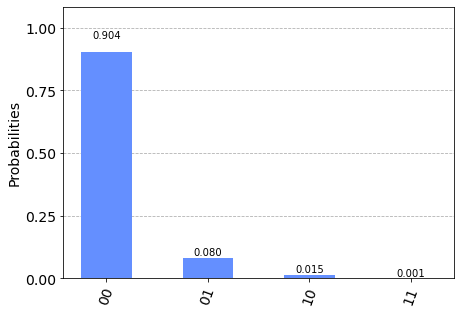

In [23]:
from qiskit import *
from qiskit.quantum_info import Statevector
import numpy as np

qr=QuantumRegister(2,'q')
qc=QuantumCircuit(qr)

# randomly oriented qubits
a=np.pi*np.random.rand()
b=np.pi*np.random.rand()
c=np.pi*np.random.rand()
qc.u(a,b,c,0)
a=np.pi*np.random.rand()
b=np.pi*np.random.rand()
c=np.pi*np.random.rand()
qc.u(a,b,c,1)

# get the statevector in dict format
psi=Statevector(qc).to_dict()

# evaluate of probabilities
p0 = dict()
for k in psi:
    p0[k]=abs(psi[k])**2

from qiskit.visualization import plot_histogram
print("probability distribution before swap")
plot_histogram(p0)

probability distribution after swapping.


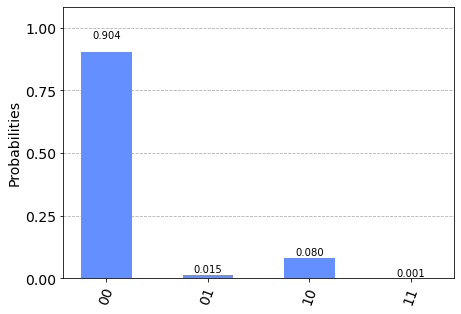

In [24]:
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)

psi=Statevector(qc).to_dict()

p1 = dict()
for k in psi:
    p1[k]=abs(psi[k])**2

print("probability distribution after swapping.")
plot_histogram(p1)


[^symb-cx]: The notation `CX`$_{q_0}^{q_1}$ is not commonly used.  In many literature, simply `CX` is used without specifying which qubit is source, causing confusion. If you are confused, see the corresponding circuit diagram.




---
Last Modified on 08/22/2022.